## Jay Desmarais CMSC 320 Project 3: Gapminder

In [429]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Part 1: Regression Analysis of Gapminder Data

##### Exercise 1: Make a scatter plot of life expectancy across time.

Text(0.5, 1.0, 'Life Expectancy by Year Across Multiple Countries')

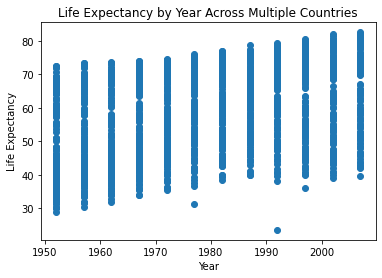

In [430]:
# Grab the data and read it from the local tsv file.
data = pd.read_csv("./mirror/08_gap-every-five-years.tsv", sep='\t')

# Create the figure and subplot.
fig, ax = plt.subplots()

# Fetch and plot the desired x and y values.
x = data['year'].values
y = data['lifeExp'].values
ax.scatter(x, y)

# Label the graph accordingly
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Year Across Multiple Countries")

# This graph shows the life expectancies of all countries in the data set every five years from 1952 and 2007.
# The data at each year has a rather wide range and is relatively evenly distributed across the range.
# There is a general upwards trend with an increasing max and min, but a steady size range and distribution with a few outliers.


##### Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)

The general trend for this plot would be best described as increasing linearly across time as there is a relatively constant increase in both the maximum life expectancy and the minimum life expectancy over time, not accounting for visible outliers.

##### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

The distribution of life expectancy across countries appears to be pretty uniform as there is a relatively even distibution showing no skew and little symmetry, in addition no lacking unimodality.

##### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)

I would reject the null hypothesis.

##### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)

A violin plot of this data would look very similar to the one in the instructions, but it would be more centered around 0 as the increase in life expectancy wont be shown other than in frequency at certain levels.

##### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

A violin plot of this data would look very similar, if not identical to the one displayed in the README, with a close-to-linearly increasing mean, ranges that compress and expand over time, and an overall linear increase in the data and it's distribution. I think everything is okay.

##### Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.

In [431]:
# Reshape x to fit the required format for LinearRegression.
x = x.reshape(-1, 1)

# Create a LinearRegression model fitted to the year and life expectancy, and grab it's values.
model = LinearRegression().fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# Define the equation of the model.
print("Fitted Model equation: y = {}x - {}".format(slope, -intercept))

# The code above fits a linear regerssion model to the data and calculates the equation of said model.

Fitted Model equation: y = 0.3259038276371518x - 585.6521874415448


##### Question 6: On average, by how much does life expectancy increase every year around the world?

In [432]:
# Group the data by year and take the mean life exepctancy across all continents for each year.
averaged = data.groupby(by=['year']).mean()

# Calcluate the total change in average life expectancy across the world from 1952 to 2007.
change_in_averages = averaged.loc[2007]['lifeExp'] - averaged.loc[1952]['lifeExp']

# Find the average year-over-year change in life expectancy.
yearly_avg_increase = change_in_averages / (2007 - 1952)

print("On average, life expectancy around the world increases by {} each year.".format(yearly_avg_increase))
print("However, according to the regression model, the yearly increase is approx. {}.".format(slope))

# The above code finds the yearly increase in life expectancy based on the average life expectancy of the first and last year data was recorded.
# It also prints the year-over-year change calculated as the slope of the regression model for comparison, both of which are very similar.

On average, life expectancy around the world increases by 0.32636005121638917 each year.
However, according to the regression model, the yearly increase is approx. 0.3259038276371518.


##### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

I reject the null hypothesis that there is no relationship between year and life expectancy because the sample relationship shown above with a steady increase in both the model and average is unlikely.

##### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

Text(0.5, 1.0, 'Residual Values by Year')

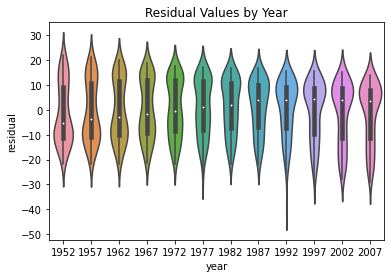

In [433]:
# Add the residual values and their corresponding year to a new list. 
residuals = []
for count, value in enumerate (y):
    residuals.append([x[count][0], value - (slope * x[count][0] + intercept)])

# Create a new dataframe based on the above values.
residual = pd.DataFrame(residuals, columns = ['year', 'residual'])

# Plot the residual vlues on a violin plot by year and label the graph accordingly.
ax = sns.violinplot(x="year", y="residual", data=residual)
ax.set_title("Residual Values by Year")

# The above code takes each life expectancy value and its corresponding year and find the residual between that and the models predicted value for that year.
# That residual value is then plotted on a violin plot to see the distribution of residuals across years. 
# It can be seen that there is a wide range of residuals that are distributed below the regression line at first, but move to be distribured above the regression line in later years.
# It can also be seen that the range of values on either side of the regression line stays relatively constant.


##### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Yes, for the most part, but the graph appears to have more of downward trend than expected, even though it is very slight.

##### Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

Text(0.5, 1.0, 'Residual Values by Continent')

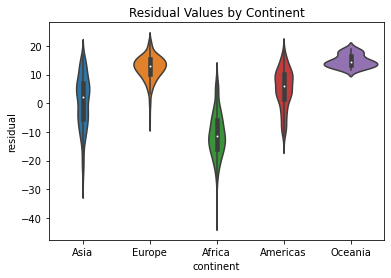

In [434]:
# The continent values are now added to the residual dataframe that was created above.
residual['continent'] = data['continent'].values

# Plot the residual values on a violin plot by continent and label the graph accordingly.
ax = sns.violinplot(x="continent", y="residual", data=residual)
ax.set_title("Residual Values by Continent")

# The above code takes those previously calculated residuals and plots them based on the Continent.
# It can be seen that there is a sort of dependence between the model residual and the continent the residual is from.
# This can be seen because each continents is has its own consistency in grouping of residuals a certain distance from the model's estimates.
# This shows that it would be best to take into consideration other parameters in the model to get a better estimate based on other factors.

##### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, there is a dependence between model residual and continent. In performing a regression analysis of life expectancy across time, it would make sense to look at it on a smaller scale and look at life expectancy across time by conntinent.

##### Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line. The result here can be given as either one scatter plot per continent, each with its own regression line, or a single plot with each continent's points plotted in a different color, and one regression line per continent's points. The former is probably easier to code up.

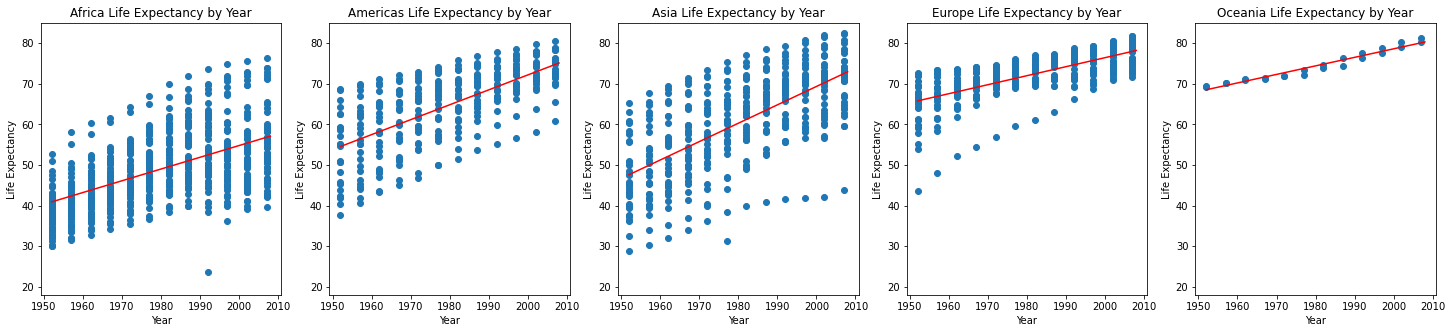

In [435]:
# Create a set of 5 plots.
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

# Add life expectancy to the residual dataframe.
residual['lifeExp'] = data['lifeExp'].values

# Group the data in the residal dataframe by continent.
grouped = residual.groupby('continent')

# Loop through every continent group in the grouped set.
i = 0
for key, group in grouped:
    # Set x and y values to the year and life expectancy columns of the dataframe group.
    x = group['year'].values
    y = group['lifeExp'].values
    # Create a scatterplot of the above x and y values, naming and shaping it as needed.
    ax[i].scatter(x, y)
    ax[i].set_title('{} Life Expectancy by Year'.format(key))
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Life Expectancy')
    ax[i].set_ylim(18,85)

    # Reshape the x values as needed by the LinearRegression.
    x = x.reshape(-1, 1)
    # Create a LinearRegression model fitted to the year and life expectancy, and grab it's values.
    model = LinearRegression().fit(x, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    # Create an evenly distributed set of x values to plot the model against.
    x = np.linspace(1952,2008,200)
    # Calculate the y values of the ploy using the slope and intercept of the model.
    y = slope * x + intercept
    # Plot the linear regression line on the same graph as the scatterplot for the specified group.
    ax[i].plot(x,y, 'r')
    # Increment the axis for the plot.
    i += 1

# The above code creates a set of 5 graphs that plot life expectancy by year of 5 different continents and fits a linear regression model to each.
# The data pertaining to each continent is grouped and plotted to view the effect of continent on life expectancy in comparison to the scatterplot and line of regression plotted for the world.
# These graphs show us that there is in fact a large correlation between life expectancy by year and the continent that the data is taken of.
# This makes it evident that when looking at life expectancy, it is a good idea to also factor in the continent from which the data is taken.

##### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, the regression model should have an interaction term for continent and year because both variables have different effects on life expectancy and influence each other.

##### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). Hint: adding interaction terms is a form of feature engineering, like we discussed in class (think about, e.g., using (a subset of) polynomial features here).

In [436]:
# Loop through every continent group in the grouped set.
X = []; y = []; j = 0
for key, group in grouped:
    # Add the year and continent number to a list of X values
    X += ( [i[0],j] for i in data.loc[data['continent'] == key]['year'].values.reshape(-1, 1))
    # Add the corresponding life expectancy value to a list of y values.
    y += ( i for i in data.loc[data['continent'] == key]['lifeExp'].values)
    # Create a search criteria that looks for a continent that is equal to the key of the group.
    mask = data['continent'] == key
    # Locate all instances of a continent matching the mask and assign the continent number for that group to j.
    data.loc[mask, 'continent_num'] = j
    # Increment the continent number value.
    j += 1

# Create an interaction PolynomialFeature.
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
# Fit and transform the X values specefied in the above loop.
X_inter = interaction.fit_transform(X)
# Fit the a linear regression model to the fitted and transformed x values and the corresponding y values.
model = LinearRegression().fit(X_inter, y)
# Grab the coefficient value from the linear regression model.
coef = model.coef_

# Print out the fitted model coefficients.
print("Fitted Model Coefficients: {}".format(coef))

# The above assigns a numerical value to each continent and then uses those values, along with the year to make a linear model with in intersection.
# This linear model is more accurate than the one previously created because it takes into account 2 parameters and their effect on each other and the outcome.
# By adding the continent with the year, out model is now more accurate and can better predict life expectancy values.

Fitted Model Coefficients: [ 3.31308773e-01  1.48163304e+01 -4.06085828e-03]


##### Question 11: Are all parameters in the model significantly (in the p-value sense) different from zero? If not, which are not significantly different from zero? Other libraries (statsmodels or patsy may help you solve this problem)

In [437]:
# Get and print the summary statistics for the 
results = sm.OLS(y,X_inter).fit()
print(results.summary())

# The above code gets the summary statistics and regression results from the above regression with interaction.
# The three parameters are x1: Year, x2: Country, and x3 (x1x2), the interaction of Year and Country.
# Not all parameters are significantly different from zero. 
# The parameters that aren't significantly different from zero are the year (x1) and the interaction between year and country (x3).

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.549e+04
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                        0.00
Time:                        20:21:35   Log-Likelihood:                         -6157.6
No. Observations:                1704   AIC:                                  1.232e+04
Df Residuals:                    1701   BIC:                                  1.234e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

In [438]:
# The data is now regrouped by continent.
grouped = data.groupby('continent')

# Loop through every continent in grouped.
i = 0
for key, group in grouped:
    # Fit and transform the the first and last year of the dataset to the previously created interaction for each continent.
    Xa_inter = interaction.fit_transform([[2007, i]])
    Xb_inter = interaction.fit_transform([[1952, i]])
    # Calculate the change in life expectancy based on the predicted values of these models at the first and last years.
    change_in_lifeExp = model.predict(Xa_inter)[0] - model.predict(Xb_inter)[0]
    # Calculate the average change in life expectancy by year.
    yearly_avg_increase = change_in_lifeExp / (2007 - 1952)
    # Print out the results
    print("The year over year average life expectancy increase for {} based on the model is {}".format(key, yearly_avg_increase))
    i += 1

# The above code uses the new linear regression model with interaction to find a predicted first and last year life expectancy for each continent.
# From there, it takes the average increase in life expectancy from each continent and prints it out.
# This seperates the previously calculated average year-over-year life expectancy into multiple values that are more specific to each continent.

The year over year average life expectancy increase for Africa based on the model is 0.3313087728073883
The year over year average life expectancy increase for Americas based on the model is 0.3272479145313334
The year over year average life expectancy increase for Asia based on the model is 0.3231870562552765
The year over year average life expectancy increase for Europe based on the model is 0.3191261979792216
The year over year average life expectancy increase for Oceania based on the model is 0.31506533970316675


##### Exercise 7: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

Text(0.5, 1.0, 'Residual Values by Year With Interaction')

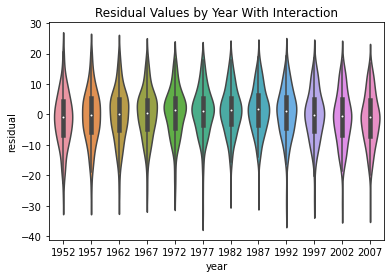

In [439]:
# Get the 2 independent variables, year, and continent_num and store them as x values.
x = data['year'].values
x2 = data['continent_num'].values

# Get the corresponding life expectancies and store them as y values.
y = data['lifeExp'].values

# Loop through every life expectancy value.
residuals = []
for count, value in enumerate (y):
    # Create a varaible that stores the x values after they are fit and transformed based on the previously created interaction.
    inter_fit = interaction.fit_transform([[x[count], int(x2[count])]])
    # Add the residual values and their corresponding year to a new list.
    residuals.append([x[count], value - model.predict(inter_fit)[0]])

# Create a new dataframe based on the above values.
residual = pd.DataFrame(residuals, columns = ['year', 'residual'])

# Plot the residual values on a violin plot by year and label the graph accordingly.
ax = sns.violinplot(x="year", y="residual", data=residual)
ax.set_title("Residual Values by Year With Interaction")

# The above code calculates the residual values of each life expectancy value based on how far it is off of the new linear regression model's estimate.
# That residual value is then plotted on a violin plot to see the distribution of residuals across years.
# It can be seen in this graph that the residual values are more evenly distributed around 0.
# This means that the new linear regression model more closely predicts the life expectancy of a given year when the continent is taken into consideration.

### Part 2: Classification



In [547]:
# Re-import stuff so I don't have to run all, and can start here.
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree, ensemble


##### a) Describe the dataset you are using, including: what is the outcome you are predicting (remember this should be a classification task) and what are the predictors you will be using.

The dataset, as described by it's collectors, Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani, is a dataset of "Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline." More simply, it is a collection of measurements taken from a group of diabetes patients.

The outcome I am predicting is that there is a high correlation between the predictors and the y level, or quantitative measure of disease progression described above, so that the higher someone's predictors are, the higher the y - value is.

The predictors that I will be using are bmi (Body Mass Index) and bp (Blood Pressure).

In [615]:
# Fetch the data from its source and format it into a pandas dataframe.
data_url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
names = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu", "y"]
raw_df = pd.read_csv(data_url, sep="\s+", header=0, names=names)
# Seperate the predictors into their own dataframe.
predictors = raw_df[['bmi']]

# Format the predictors as a 2d list and store them as the X value.
X = predictors.values.tolist()
# Store the y calculation as the y value.
y = raw_df['y']


# Algorithm 1: Decision Tree Regressor

# Create the regressor.
dtr = ensemble.AdaBoostRegressor(\
    tree.DecisionTreeRegressor(max_depth=8), n_estimators=300\
    )
# Train the data.
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit the regressor to the training data.
dtr = dtr.fit(X_train, y_train)
print("Algorithm 1: Decision Tree")

# Predict new data.
ypred = dtr.predict(X_test)

# Calculate the r^2 score for both the training and test data.
print("Training Accuracy = ", dtr.score(X_train, y_train))
print("Test Accuracy = ", dtr.score(X_test, y_test))

# Calculate the mean squared error.
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

# Calculate the mean absolute error.
errors = abs(ypred - y_test)
print("Mean absolute error:", round(np.mean(errors), 2))

# Algorithm 2: Random Forests

rf = ensemble.RandomForestRegressor(max_depth=8)
# Train the data.
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Fit the regressor to the training data.
rf = rf.fit(X_train, y_train)
print("\nAlgorithm 2: Random Forest")

# Predict new data.
ypred = rf.predict(X_test)

# Calculate the r^2 score for both the training and test data.
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy = ", rf.score(X_test, y_test))

# Calculate the mean squared error.
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

# Calculate the mean absolute error.
errors = abs(ypred - y_test)
print("Mean absolute error:", round(np.mean(errors), 2))

Algorithm 1: Decision Tree
Training Accuracy =  0.6150556529797402
Test Accuracy =  0.056586208494832646
MSE:  5520.693189570201
RMSE:  2760.3465947851005
Mean absolute error: 60.59

Algorithm 2: Random Forest
Training Accuracy =  0.5872428285845568
Test Accuracy =  0.18327124401042427
MSE:  4723.676342006497
RMSE:  2361.8381710032486
Mean absolute error: 55.46


##### b) Specify the two additional algorithms you have chosen, and for algorithms that have hyper-parameters specify the method you are using for model selection. Compare the two chosen algorithms on their prediction performance, using your chosen dataset. Let us know what your performance metric is (e.g., accuracy, false negative rate (FNR), false positive rate (FPR), precision, recall, etc), and feel free to use more than one. Write up the result of your holdout procedure.

The two additional algorithms I have chosen are Decision Tree and Random Forest

Based on my performance metrics of the r^2 score, the mean squared error, and the mean absolute error, the Random Forest Regressor is more accurate, although neither are accurate in the slightest. Both models seem to lack the ability to predict the outcome, but the Decision Tree is ever so slightly worse.
